# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT1/data
/content/gdrive/MyDrive/36106/assignment/AT1/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [4]:
# <Student to fill this section>
!apt-get update > /dev/null 2>&1
!apt-get install -y texlive texlive-xetex texlive-latex-extra pandoc > /dev/null 2>&1

### 0.d Import Packages

In [3]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
## A. Project Description


In [ ]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

In [ ]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=0,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=0, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [8]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

---
## B. Experiment Description

In [ ]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

In [ ]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

---
## C. Data Understanding

### C.1   Load Datasets

> Do not change this code

In [4]:
# Load training data
training_df = pd.read_csv(folder_path / "rental_training.csv")

In [5]:
# Load validation data
validation_df = pd.read_csv(folder_path / "rental_validation.csv")

In [6]:
# Load testing data
testing_df = pd.read_csv(folder_path / "rental_testing.csv")

### C.2 Explore Training Set

> You can add more cells in this section

In [ ]:
# <Student to fill this section>
training_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-05-18,2,568.0,1100,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,02/,1,Mcdowell Edge,Driveway,Mr.,Robert,Jones,m,(08) 8174 5701,georgelopez@example.org
1,2022-05-13,2,581.0,800,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,667/,6,Lewis Parkway,Viaduct,Mrs.,Lisa,Mcknight,f,(08).5553.7944,robertdorsey@example.net
2,2022-05-16,2,577.0,1000,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1,Contact Owner,859/,459,Daniel Copse,Meander,NaN,Annette,Lester,u,(03).6394.3934,rodriguezkaren@example.net
3,2022-05-09,2,565.0,850,1 out of 2,Canberra,Unfurnished,Bachelors,1,Contact Owner,Flat 54,482,Young Walkway,Firetrail,Mrs.,Emma,Hill,f,+61836311377,johnsonjeremy@example.com
4,2022-04-29,2,564.0,600,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 75,838,Michael Port,Esplanade,Miss,Ariana,Richardson,f,+61 409 341 340,sbrown@example.net


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      3434 non-null   object 
 1   number_of_bedrooms   3434 non-null   int64  
 2   rent                 3434 non-null   float64
 3   floor_area           3434 non-null   int64  
 4   level                3434 non-null   object 
 5   suburb               3434 non-null   object 
 6   furnished            3434 non-null   object 
 7   tenancy_preference   3434 non-null   object 
 8   number_of_bathrooms  3434 non-null   int64  
 9   point_of_contact     3434 non-null   object 
 10  secondary_address    3434 non-null   object 
 11  building_number      3434 non-null   int64  
 12  street_name          3434 non-null   object 
 13  street_suffix        3434 non-null   object 
 14  prefix               2274 non-null   object 
 15  first_name           3434 non-null   o

In [ ]:
training_df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000
mean,2.022423,595.080664,919.708794,1.881188,189.853815
std,0.813388,105.380805,588.741127,0.850203,284.860733
min,1.000000,557.000000,20.000000,1.000000,0.000000
25%,1.000000,567.000000,550.000000,1.000000,7.000000
50%,2.000000,574.000000,800.000000,2.000000,46.000000
75%,2.000000,590.000000,1186.000000,2.000000,268.750000
max,6.000000,5037.000000,8000.000000,10.000000,998.000000


<Axes: xlabel='rent', ylabel='Count'>

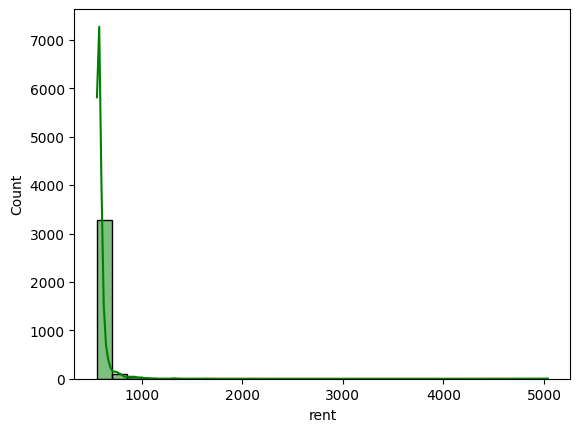

In [ ]:
sns.histplot(training_df['rent'], bins=30, kde=True, color="green")

<Axes: ylabel='rent'>

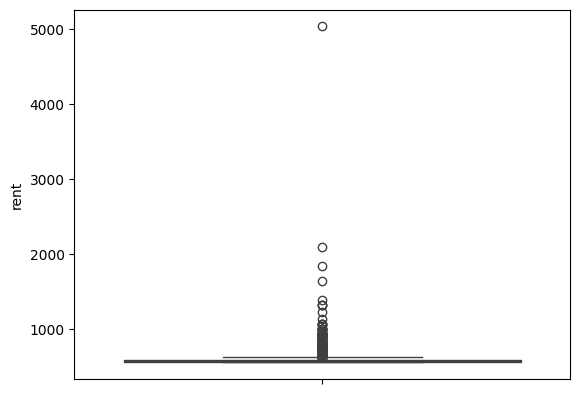

In [ ]:
sns.boxplot(y=training_df['rent'])

<Axes: xlabel='floor_area', ylabel='rent'>

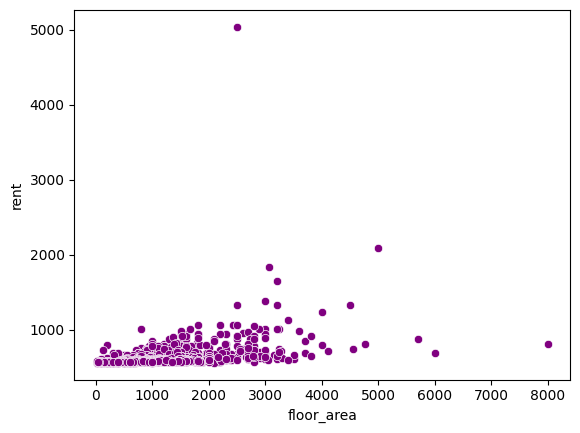

In [ ]:
sns.scatterplot(x=training_df['floor_area'], y=training_df['rent'], color="purple")

<Axes: xlabel='number_of_bedrooms', ylabel='rent'>

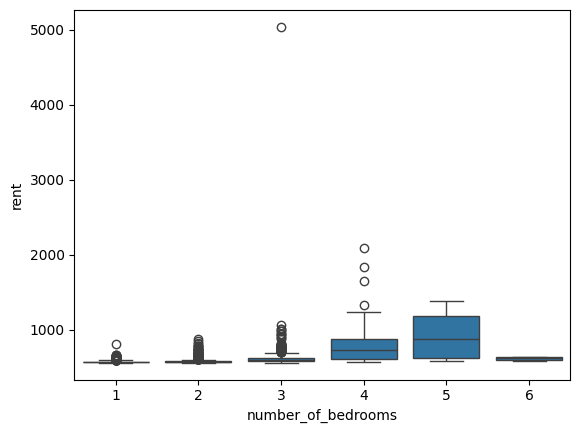

In [ ]:
sns.boxplot(x=training_df['number_of_bedrooms'], y=training_df['rent'])

<ipython-input-13-c6f3a7ebee97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=training_df['suburb'], y=training_df['rent'], palette="coolwarm")


<Axes: xlabel='suburb', ylabel='rent'>

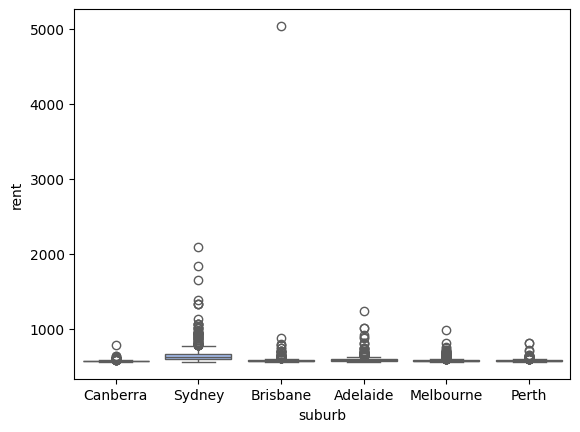

In [ ]:
sns.boxplot(x=training_df['suburb'], y=training_df['rent'], palette="coolwarm")

In [ ]:
# @title Training Set Insights

wgt_eda_training_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Training Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_training_set_insights

Textarea(value='', description='Training Set Insights:', layout=Layout(height='100%', width='auto'), placehold…

### C.3 Explore Validation Set

> You can add more cells in this section

In [ ]:
# <Student to fill this section>
validation_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,Level 1,1,Baldwin Towers,Footway,NaN,Jay,Glover,u,(03)08687820,brettkennedy@example.net
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,1/,31,Cox Fire Track,Lookout,Dr.,Danielle,Tran,f,(03)-0313-6072,dana35@example.net
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 37,89,Davidson Ground,Part,NaN,Ashley,Pacheco,u,08-9358-6662,justin89@example.org
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,16/,82,Fitzpatrick Key,Heights,NaN,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,Flat 64,9,Heidi Access,Mews,Mrs.,Kerry,Koch,f,4124.0210,hansendiana@example.com


In [ ]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1320 non-null   object 
 1   number_of_bedrooms   1320 non-null   int64  
 2   rent                 1320 non-null   float64
 3   floor_area           1320 non-null   int64  
 4   level                1320 non-null   object 
 5   suburb               1320 non-null   object 
 6   furnished            1320 non-null   object 
 7   tenancy_preference   1320 non-null   object 
 8   number_of_bathrooms  1320 non-null   int64  
 9   point_of_contact     1320 non-null   object 
 10  secondary_address    1320 non-null   object 
 11  building_number      1320 non-null   int64  
 12  street_name          1320 non-null   object 
 13  street_suffix        1320 non-null   object 
 14  prefix               855 non-null    object 
 15  first_name           1320 non-null   o

In [ ]:
validation_df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,2.091667,596.413636,959.723485,1.946212,189.813636
std,0.819543,67.974174,645.170039,0.879891,283.228988
min,1.000000,557.000000,10.000000,1.000000,0.000000
25%,2.000000,568.000000,550.000000,1.000000,6.000000
50%,2.000000,574.000000,825.500000,2.000000,49.000000
75%,3.000000,594.000000,1200.000000,2.000000,270.000000
max,6.000000,1451.000000,6000.000000,7.000000,996.000000


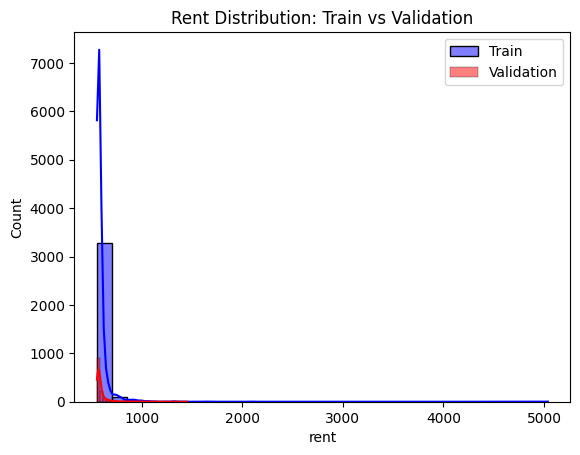

In [ ]:
sns.histplot(training_df['rent'], bins=30, kde=True, color="blue", label="Train", alpha=0.5)
sns.histplot(validation_df['rent'], bins=30, kde=True, color="red", label="Validation", alpha=0.5)
plt.legend()
plt.title("Rent Distribution: Train vs Validation")
plt.show()

<ipython-input-18-4b842f1a6dfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=training_df['furnished'], y=training_df['rent'], palette="Blues", ax=axes[0])
<ipython-input-18-4b842f1a6dfb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=validation_df['furnished'], y=validation_df['rent'], palette="Reds", ax=axes[1])


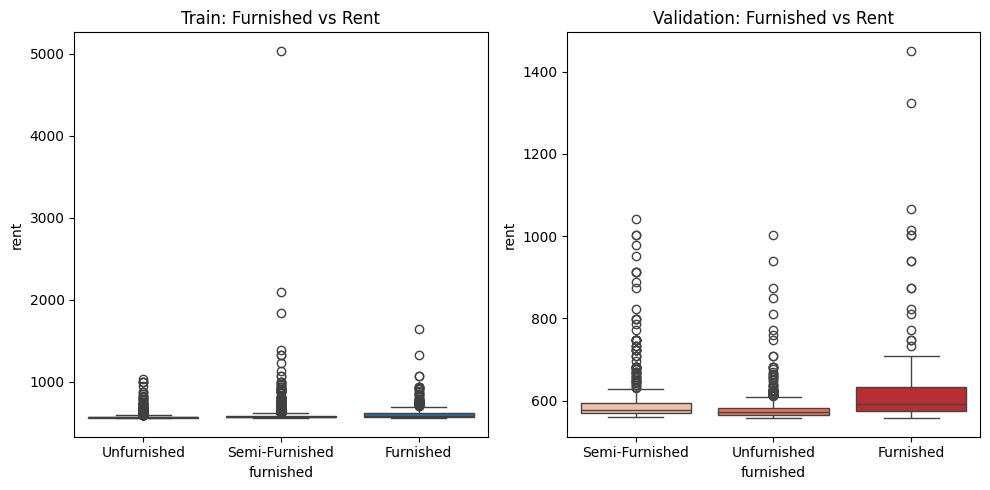

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x=training_df['furnished'], y=training_df['rent'], palette="Blues", ax=axes[0])
axes[0].set_title("Train: Furnished vs Rent")

sns.boxplot(x=validation_df['furnished'], y=validation_df['rent'], palette="Reds", ax=axes[1])
axes[1].set_title("Validation: Furnished vs Rent")

plt.tight_layout()
plt.show()

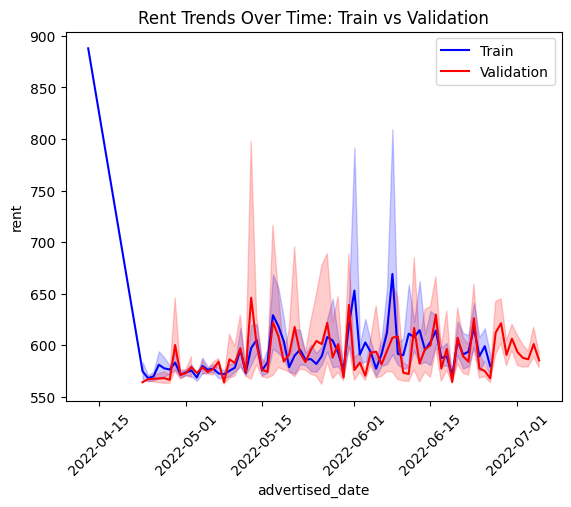

In [ ]:
training_df['advertised_date'] = pd.to_datetime(training_df['advertised_date'])
validation_df['advertised_date'] = pd.to_datetime(validation_df['advertised_date'])

sns.lineplot(x=training_df['advertised_date'], y=training_df['rent'], label="Train", color="blue")
sns.lineplot(x=validation_df['advertised_date'], y=validation_df['rent'], label="Validation", color="red")
plt.title("Rent Trends Over Time: Train vs Validation")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# @title Validation Set Insights

wgt_eda_validation_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Validation Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_validation_set_insights

Textarea(value='', description='Validation Set Insights:', layout=Layout(height='100%', width='auto'), placeho…

### C.4 Explore Testing Set

> You can add more cells in this section

In [ ]:
# <Student to fill this section>
testing_df.head()

,advertised_date,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,point_of_contact,secondary_address,building_number,street_name,street_suffix,prefix,first_name,last_name,gender,phone_number,email
0,2022-06-13,2,571.0,560,Ground out of 1,Melbourne,Semi-Furnished,Family,2,Contact Owner,Level 1,1,Baldwin Towers,Footway,NaN,Jay,Glover,u,(03)08687820,brettkennedy@example.net
1,2022-06-04,2,683.0,750,Upper Basement out of 30,Sydney,Unfurnished,Bachelors/Family,2,Contact Agent,1/,31,Cox Fire Track,Lookout,Dr.,Danielle,Tran,f,(03)-0313-6072,dana35@example.net
2,2022-04-29,3,574.0,950,Ground out of 3,Adelaide,Unfurnished,Bachelors/Family,2,Contact Owner,Unit 37,89,Davidson Ground,Part,NaN,Ashley,Pacheco,u,08-9358-6662,justin89@example.org
3,2022-05-18,1,565.0,500,2 out of 2,Sydney,Semi-Furnished,Bachelors,1,Contact Owner,16/,82,Fitzpatrick Key,Heights,NaN,Victoire,Weber,u,(02).9817.8199,pruittmichael@example.net
4,2022-04-28,2,565.0,600,2 out of 3,Brisbane,Semi-Furnished,Bachelors/Family,2,Contact Owner,Flat 64,9,Heidi Access,Mews,Mrs.,Kerry,Koch,f,4124.0210,hansendiana@example.com


In [ ]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1364 non-null   object 
 1   number_of_bedrooms   1364 non-null   int64  
 2   rent                 1364 non-null   float64
 3   floor_area           1364 non-null   int64  
 4   level                1364 non-null   object 
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
 9   point_of_contact     1364 non-null   object 
 10  secondary_address    1364 non-null   object 
 11  building_number      1364 non-null   int64  
 12  street_name          1364 non-null   object 
 13  street_suffix        1364 non-null   object 
 14  prefix               877 non-null    object 
 15  first_name           1364 non-null   o

In [ ]:
testing_df.describe()

,number_of_bedrooms,rent,floor_area,number_of_bathrooms,building_number
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2.184751,609.290323,1054.319648,2.098974,194.462610
std,0.845966,79.660648,691.094588,0.928729,290.294334
min,1.000000,557.000000,25.000000,1.000000,0.000000
25%,2.000000,571.000000,600.000000,1.000000,6.000000
50%,2.000000,581.000000,900.000000,2.000000,46.000000
75%,3.000000,613.000000,1300.000000,3.000000,274.500000
max,6.000000,1426.000000,7000.000000,7.000000,996.000000


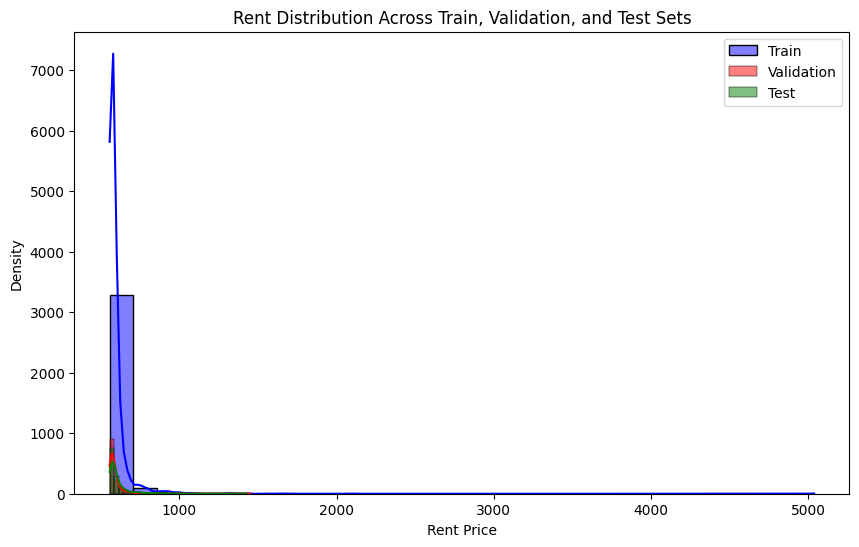

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(training_df['rent'], bins=30, kde=True, color="blue", label="Train", alpha=0.5)
sns.histplot(validation_df['rent'], bins=30, kde=True, color="red", label="Validation", alpha=0.5)
sns.histplot(testing_df['rent'], bins=30, kde=True, color="green", label="Test", alpha=0.5)

plt.legend()
plt.title("Rent Distribution Across Train, Validation, and Test Sets")
plt.xlabel("Rent Price")
plt.ylabel("Density")
plt.show()

<ipython-input-24-c25ef976dd3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=training_df['number_of_bedrooms'], palette="Blues", ax=axes[0])
<ipython-input-24-c25ef976dd3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=validation_df['number_of_bedrooms'], palette="Reds", ax=axes[1])
<ipython-input-24-c25ef976dd3d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=testing_df['number_of_bedrooms'], palette="Greens", ax=axes[2])


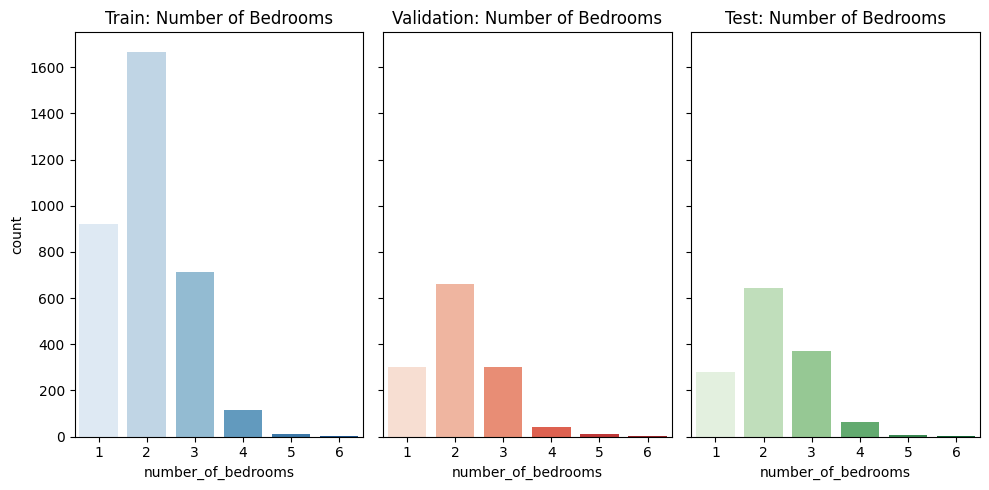

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

sns.countplot(x=training_df['number_of_bedrooms'], palette="Blues", ax=axes[0])
axes[0].set_title("Train: Number of Bedrooms")

sns.countplot(x=validation_df['number_of_bedrooms'], palette="Reds", ax=axes[1])
axes[1].set_title("Validation: Number of Bedrooms")

sns.countplot(x=testing_df['number_of_bedrooms'], palette="Greens", ax=axes[2])
axes[2].set_title("Test: Number of Bedrooms")

plt.tight_layout()
plt.show()

In [ ]:
# @title Testing Set Insights

wgt_eda_testing_set_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Testing Set Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_testing_set_insights

Textarea(value='', description='Testing Set Insights:', layout=Layout(height='100%', width='auto'), placeholde…

### C.5 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [7]:
# <Student to fill this section>

target_name = 'rent'

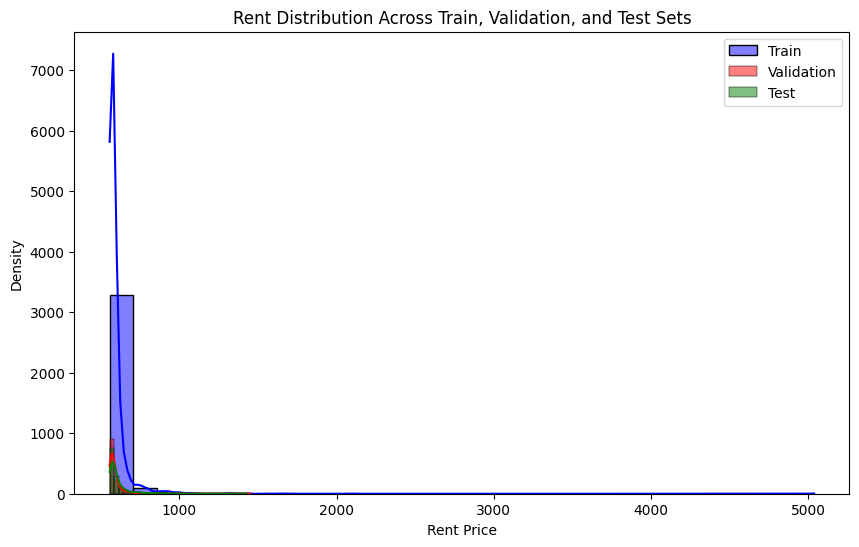

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(training_df[target_name], bins=30, kde=True, color="blue", label="Train", alpha=0.5)
sns.histplot(validation_df[target_name], bins=30, kde=True, color="red", label="Validation", alpha=0.5)
sns.histplot(testing_df[target_name], bins=30, kde=True, color="green", label="Test", alpha=0.5)

plt.legend()
plt.title("Rent Distribution Across Train, Validation, and Test Sets")
plt.xlabel("Rent Price")
plt.ylabel("Density")
plt.show()

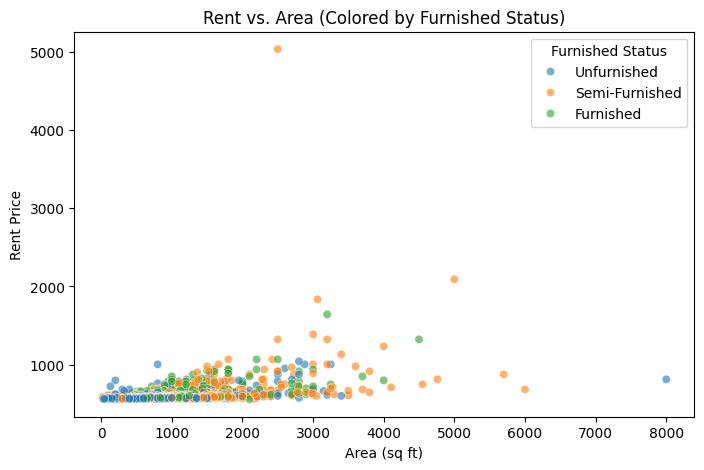

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=training_df['floor_area'], y=training_df[target_name], hue=training_df['furnished'], alpha=0.6)
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent Price')
plt.title('Rent vs. Area (Colored by Furnished Status)')
plt.legend(title='Furnished Status')
plt.show()

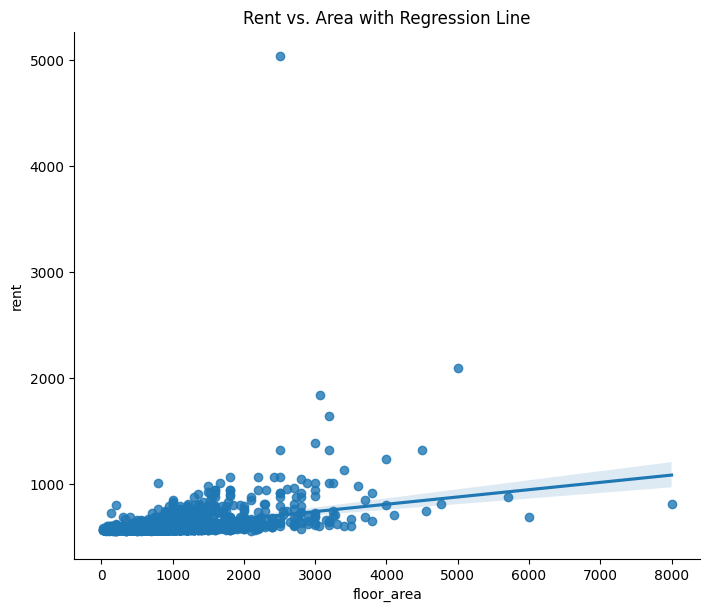

In [ ]:
sns.lmplot(x='floor_area', y=target_name, data=training_df, height=6, aspect=1.2)
plt.title('Rent vs. Area with Regression Line')
plt.show()

In [ ]:
# @title Target Variable Insights

wgt_eda_target_variable_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Target Variable Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_target_variable_insights

Textarea(value='', description='Target Variable Insights:', layout=Layout(height='100%', width='auto'), placeh…

### C.6 Explore Feature of Interest

> You can add more cells in this section

<ipython-input-29-7c8f6bf3a284>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_levels.index, y=top_levels.values, palette="coolwarm")


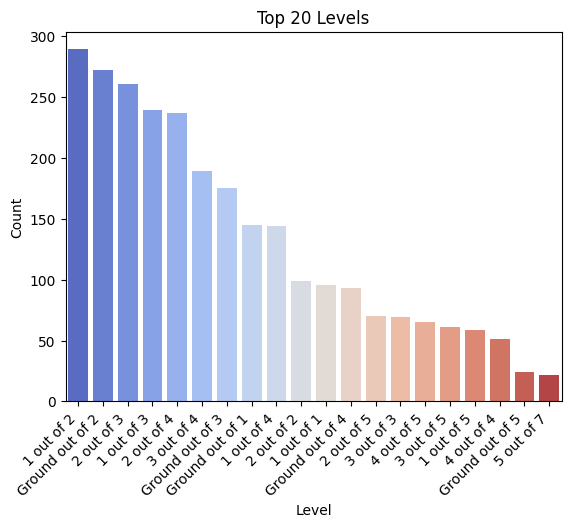

In [ ]:
# <Student to fill this section>

top_levels = training_df['level'].value_counts().nlargest(20)
sns.barplot(x=top_levels.index, y=top_levels.values, palette="coolwarm")
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Top 20 Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-30-c10296f5d189>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=training_df['tenancy_preference'], palette="coolwarm")


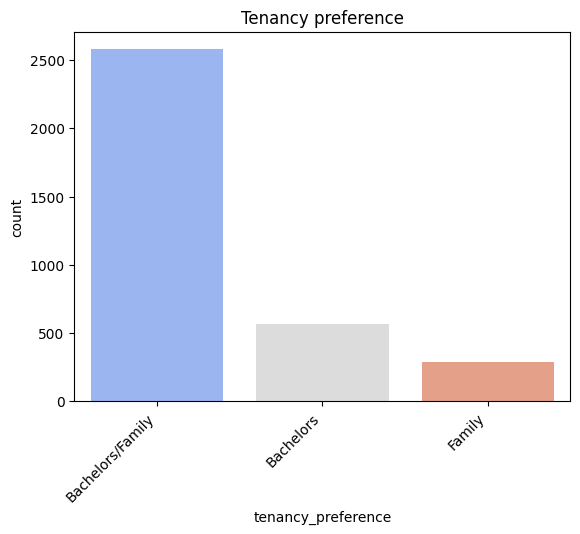

In [ ]:
sns.countplot(x=training_df['tenancy_preference'], palette="coolwarm")
plt.title('Tenancy preference')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-31-d929dd96fbcc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=training_df['point_of_contact'], palette="coolwarm")


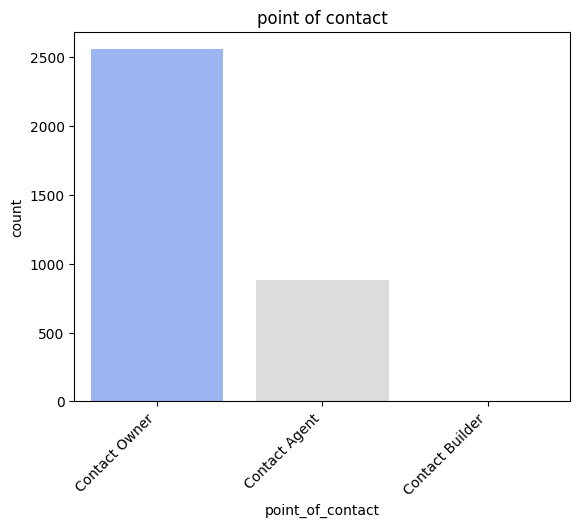

In [ ]:
sns.countplot(x=training_df['point_of_contact'], palette="coolwarm")
plt.title('point of contact')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# @title Feature Insights

wgt_eda_feature_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Insights:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_eda_feature_insights

Textarea(value='', description='Feature Insights:', layout=Layout(height='100%', width='auto'), placeholder='<…

---
## D. Feature Selection


### D.1 Approach 1

<ipython-input-32-133616612b57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_df['suburb'], y=training_df['rent'], palette="coolwarm")


<Axes: xlabel='suburb', ylabel='rent'>

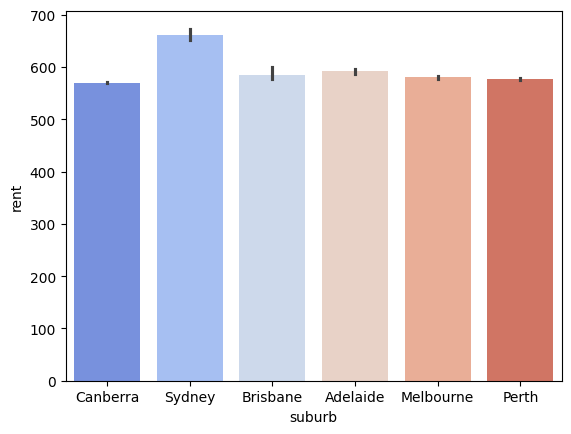

In [ ]:
# <Student to fill this section>
sns.barplot(x=training_df['suburb'], y=training_df['rent'], palette="coolwarm")

<ipython-input-33-8459c0047291>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_df['furnished'], y=training_df['rent'], palette="coolwarm")


<Axes: xlabel='furnished', ylabel='rent'>

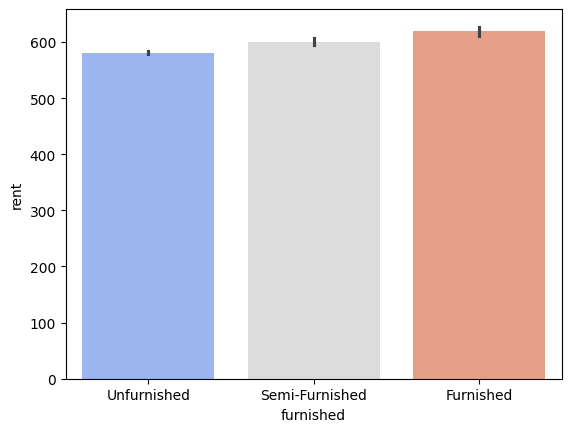

In [ ]:
sns.barplot(x=training_df['furnished'], y=training_df['rent'], palette="coolwarm")

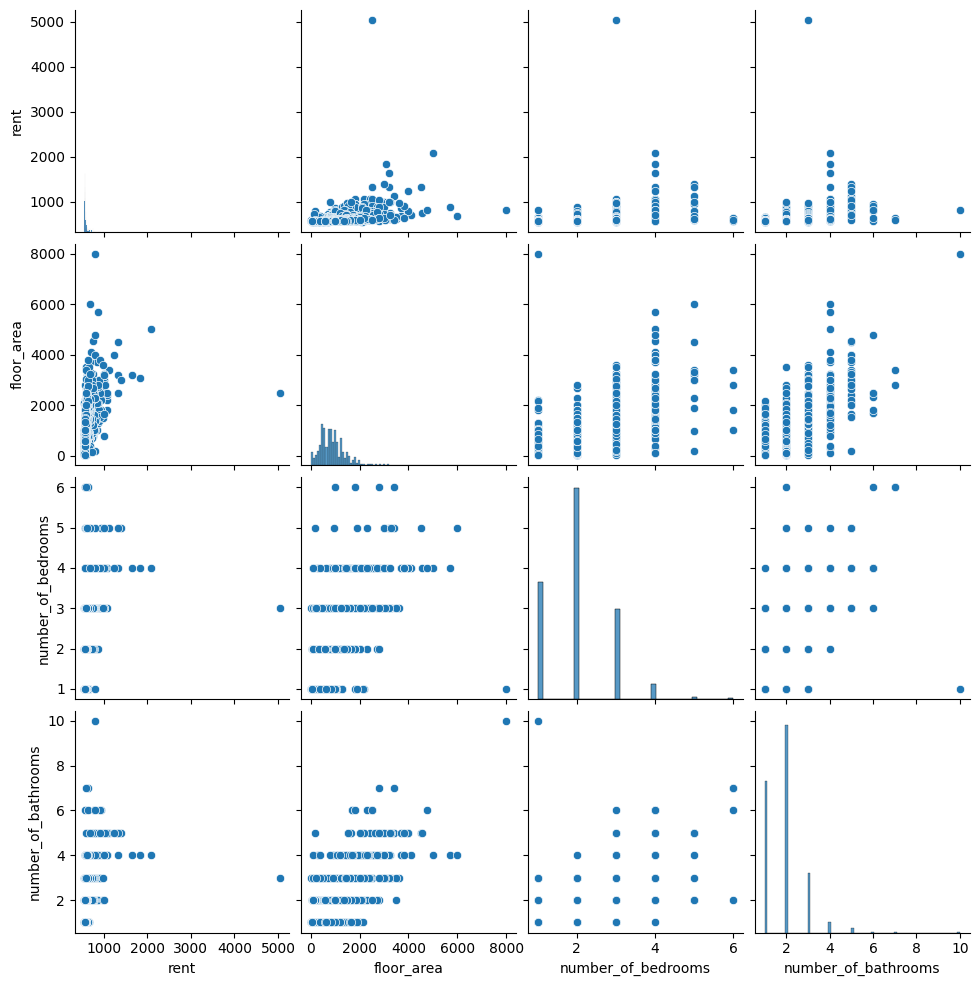

In [ ]:
sns.pairplot(training_df[['rent', 'floor_area', 'number_of_bedrooms', 'number_of_bathrooms']])

In [ ]:
# @title Feature Selection 1 Insights

wgt_feat_selection_1_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 1:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_1_insights

Textarea(value='', description='Feature Selection 1:', layout=Layout(height='100%', width='auto'), placeholder…

### D.2 Approach 2

<Axes: xlabel='building_number', ylabel='rent'>

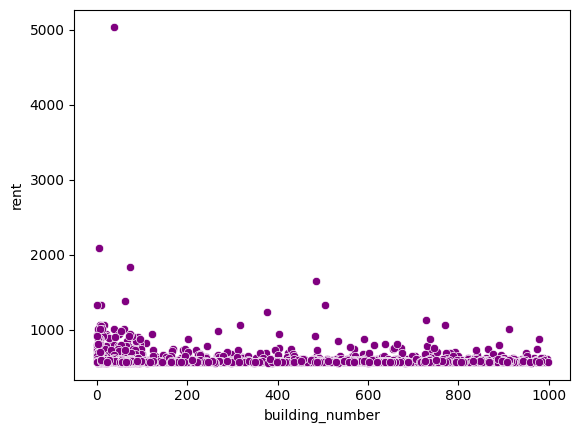

In [ ]:
# <Student to fill this section>
sns.scatterplot(x=training_df['building_number'], y=training_df['rent'], color="purple")

<ipython-input-36-f96265192fb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_df['gender'], y=training_df['rent'], palette="coolwarm")


<Axes: xlabel='gender', ylabel='rent'>

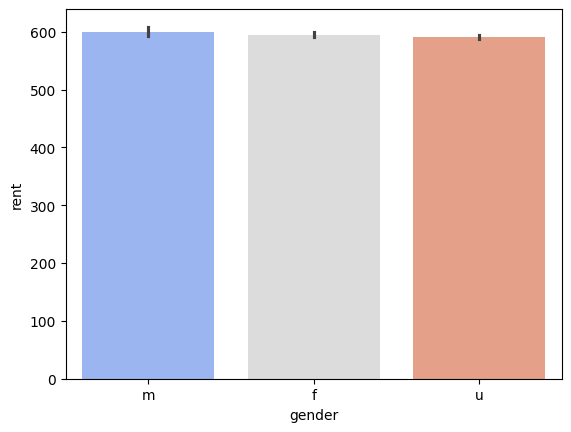

In [ ]:
sns.barplot(x=training_df['gender'], y=training_df['rent'], palette="coolwarm")

<ipython-input-37-048444da1c53>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_df['prefix'], y=training_df['rent'], palette="coolwarm")


<Axes: xlabel='prefix', ylabel='rent'>

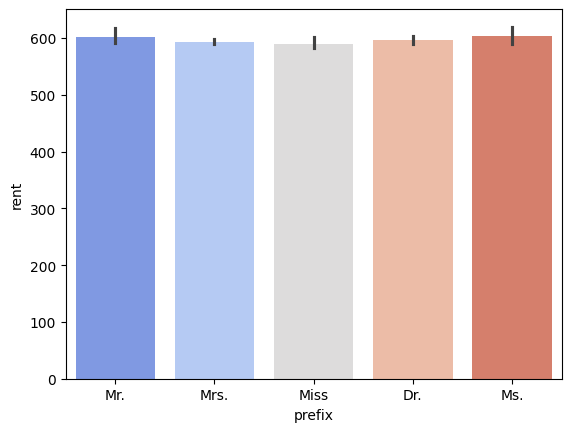

In [ ]:
sns.barplot(x=training_df['prefix'], y=training_df['rent'], palette="coolwarm")

In [ ]:
# @title Feature Selection 2 Insights

wgt_feat_selection_2_insights = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection 2:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_2_insights

Textarea(value='', description='Feature Selection 2:', layout=Layout(height='100%', width='auto'), placeholder…

## D.3 Final Selection of Features

> Save the names of selected features into a list called `features_list`

In [8]:
# <Student to fill this section>

features_list = ['advertised_date','number_of_bedrooms','rent','floor_area','level','suburb','furnished','tenancy_preference','number_of_bathrooms']

In [ ]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

---
## E. Data Cleaning

### E.1 Copy Datasets

> Create copies of the datasets and called them `training_df_clean`, `validation_df_clean` and `testing_df_clean`

> Do not change this code

In [9]:
# Create copy of datasets

training_df_clean = training_df[features_list].copy()
validation_df_clean = validation_df[features_list].copy()
testing_df_clean = testing_df[features_list].copy()

### E.2 Fixing "Data Types"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [ ]:
# <Student to fill this section>
training_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      3434 non-null   datetime64[ns]
 1   number_of_bedrooms   3434 non-null   int64         
 2   rent                 3434 non-null   float64       
 3   floor_area           3434 non-null   int64         
 4   level                3434 non-null   object        
 5   suburb               3434 non-null   object        
 6   furnished            3434 non-null   object        
 7   tenancy_preference   3434 non-null   object        
 8   number_of_bathrooms  3434 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 241.6+ KB


In [ ]:
validation_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   advertised_date      1320 non-null   datetime64[ns]
 1   number_of_bedrooms   1320 non-null   int64         
 2   rent                 1320 non-null   float64       
 3   floor_area           1320 non-null   int64         
 4   level                1320 non-null   object        
 5   suburb               1320 non-null   object        
 6   furnished            1320 non-null   object        
 7   tenancy_preference   1320 non-null   object        
 8   number_of_bathrooms  1320 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 92.9+ KB


In [ ]:
testing_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   advertised_date      1364 non-null   object 
 1   number_of_bedrooms   1364 non-null   int64  
 2   rent                 1364 non-null   float64
 3   floor_area           1364 non-null   int64  
 4   level                1364 non-null   object 
 5   suburb               1364 non-null   object 
 6   furnished            1364 non-null   object 
 7   tenancy_preference   1364 non-null   object 
 8   number_of_bathrooms  1364 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 96.0+ KB


In [10]:
training_df_clean[['level','suburb','furnished','tenancy_preference']] = training_df_clean[['level','suburb','furnished','tenancy_preference']].astype('string')
validation_df_clean[['level','suburb','furnished','tenancy_preference']] = validation_df_clean[['level','suburb','furnished','tenancy_preference']].astype('string')
testing_df_clean[['level','suburb','furnished','tenancy_preference']] = testing_df_clean[['level','suburb','furnished','tenancy_preference']].astype('string')

In [11]:
training_df_clean['advertised_date'] = pd.to_datetime(training_df_clean['advertised_date'], format='%Y-%m-%d')
validation_df_clean['advertised_date'] = pd.to_datetime(validation_df_clean['advertised_date'], format='%Y-%m-%d')
testing_df_clean['advertised_date'] = pd.to_datetime(testing_df_clean['advertised_date'], format='%Y-%m-%d')

In [ ]:
training_df_clean.dtypes

,0
advertised_date,datetime64[ns]
number_of_bedrooms,int64
rent,float64
floor_area,int64
level,string[python]
suburb,string[python]
furnished,string[python]
tenancy_preference,string[python]
number_of_bathrooms,int64


In [ ]:
validation_df_clean.dtypes

,0
advertised_date,datetime64[ns]
number_of_bedrooms,int64
rent,float64
floor_area,int64
level,string[python]
suburb,string[python]
furnished,string[python]
tenancy_preference,string[python]
number_of_bathrooms,int64


In [ ]:
testing_df_clean.dtypes

,0
advertised_date,datetime64[ns]
number_of_bedrooms,int64
rent,float64
floor_area,int64
level,string[python]
suburb,string[python]
furnished,string[python]
tenancy_preference,string[python]
number_of_bathrooms,int64


In [ ]:
# @title Data Cleaning 1 Explanation

wgt_data_cleaning_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_1_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

### E.3 Fixing "Missing Values & Duplicates"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [12]:
# <Student to fill this section>
print(training_df_clean.isna().sum())
print(".............................")
print(validation_df_clean.isna().sum())
print(".............................")
print(testing_df_clean.isna().sum())

advertised_date        0
number_of_bedrooms     0
rent                   0
floor_area             0
level                  0
suburb                 0
furnished              0
tenancy_preference     0
number_of_bathrooms    0
dtype: int64
.............................
advertised_date        0
number_of_bedrooms     0
rent                   0
floor_area             0
level                  0
suburb                 0
furnished              0
tenancy_preference     0
number_of_bathrooms    0
dtype: int64
.............................
advertised_date        0
number_of_bedrooms     0
rent                   0
floor_area             0
level                  0
suburb                 0
furnished              0
tenancy_preference     0
number_of_bathrooms    0
dtype: int64


In [13]:
duplicate_count = training_df_clean.duplicated().sum()
duplicate_count1 = validation_df_clean.duplicated().sum()
duplicate_count2 = testing_df_clean.duplicated().sum()

print("training_df_clean duplicates: ", duplicate_count)
print("validation_df_clean duplicates: ", duplicate_count)
print("testing_df_clean duplicates: ", duplicate_count)

training_df_clean duplicates:  6
validation_df_clean duplicates:  6
testing_df_clean duplicates:  6


In [14]:
training_df_clean.drop_duplicates(inplace=True)
validation_df.drop_duplicates(inplace=True)
testing_df_clean.drop_duplicates(inplace=True)

In [15]:
duplicate_count = training_df_clean.duplicated().sum()
duplicate_count1 = validation_df_clean.duplicated().sum()
duplicate_count2 = testing_df_clean.duplicated().sum()

print("training_df_clean duplicates: ", duplicate_count)
print("validation_df_clean duplicates: ", duplicate_count)
print("testing_df_clean duplicates: ", duplicate_count)

training_df_clean duplicates:  0
validation_df_clean duplicates:  0
testing_df_clean duplicates:  0


In [ ]:
# @title Data Cleaning 2 Explanation

wgt_data_cleaning_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_2_explanation

Textarea(value='', description='Data Cleaning 1 Explanation:', layout=Layout(height='100%', width='auto'), pla…

### E.4 Fixing "Outliers"

> Provide some explanations on why you believe it is important to fix this issue and its impacts

> You can add more cells in this section

In [16]:
# <Student to fill this section>

Q1 = training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.25)
Q3 = training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers_iqr = training_df_clean[((training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']] < (Q1 - 1.5 * IQR)) |
                                  (training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(outliers_iqr)

     advertised_date  number_of_bedrooms   rent  floor_area            level  \
73        2022-06-21                   6  581.0        1000       1 out of 1   
85        2022-04-29                   4  578.0        1200       1 out of 2   
88        2022-06-13                   4  600.0        1600       1 out of 5   
90        2022-06-16                   2  786.0         950  Ground out of 1   
141       2022-04-30                   4  606.0        1300       1 out of 2   
...              ...                 ...    ...         ...              ...   
3368      2022-06-20                   4  613.0        2300       4 out of 5   
3389      2022-06-18                   3  632.0        2170       4 out of 5   
3412      2022-06-17                   3  600.0        2500       2 out of 2   
3413      2022-04-30                   4  576.0        1000       1 out of 3   
3415      2022-04-29                   4  696.0        3250     12 out of 17   

        suburb       furnished tenancy_

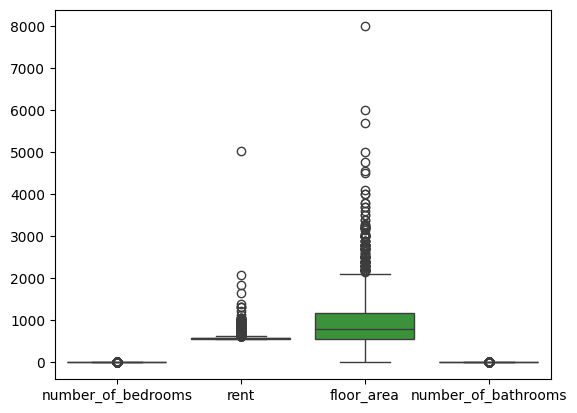

In [17]:
# Create box plot for each numeric feature
sns.boxplot(data=training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']])
plt.show()

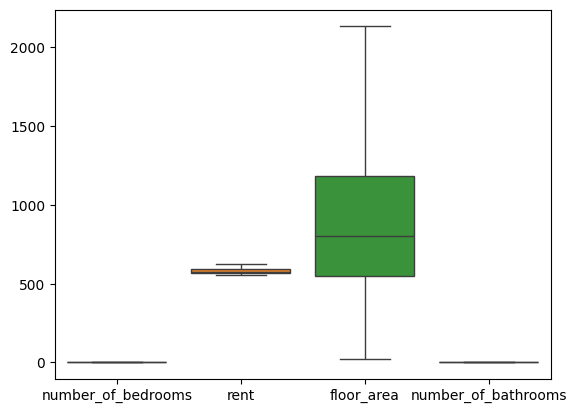

In [18]:
Q1 = training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.25)
Q3 = training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping
training_df_clean['number_of_bedrooms'] = training_df_clean['number_of_bedrooms'].clip(lower=lower_bound['number_of_bedrooms'], upper=upper_bound['number_of_bedrooms'])
training_df_clean['rent'] = training_df_clean['rent'].clip(lower=lower_bound['rent'], upper=upper_bound['rent'])
training_df_clean['floor_area'] = training_df_clean['floor_area'].clip(lower=lower_bound['floor_area'], upper=upper_bound['floor_area'])
training_df_clean['number_of_bathrooms'] = training_df_clean['number_of_bathrooms'].clip(lower=lower_bound['number_of_bathrooms'], upper=upper_bound['number_of_bathrooms'])

# Create box plot for each numeric feature
sns.boxplot(data=training_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']])
plt.show()

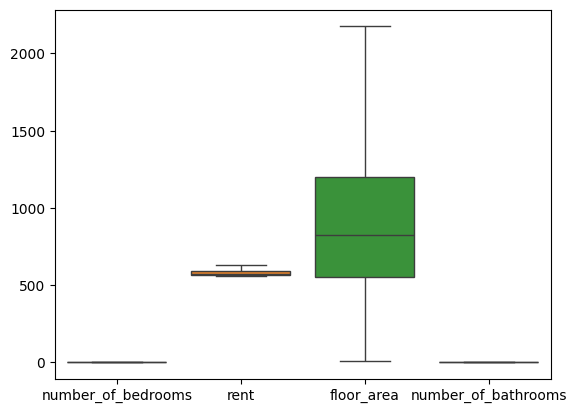

In [19]:
Q1 = validation_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.25)
Q3 = validation_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping
validation_df_clean['number_of_bedrooms'] = validation_df_clean['number_of_bedrooms'].clip(lower=lower_bound['number_of_bedrooms'], upper=upper_bound['number_of_bedrooms'])
validation_df_clean['rent'] = validation_df_clean['rent'].clip(lower=lower_bound['rent'], upper=upper_bound['rent'])
validation_df_clean['floor_area'] = validation_df_clean['floor_area'].clip(lower=lower_bound['floor_area'], upper=upper_bound['floor_area'])
validation_df_clean['number_of_bathrooms'] = validation_df_clean['number_of_bathrooms'].clip(lower=lower_bound['number_of_bathrooms'], upper=upper_bound['number_of_bathrooms'])

# Create box plot for each numeric feature
sns.boxplot(data=validation_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']])
plt.show()

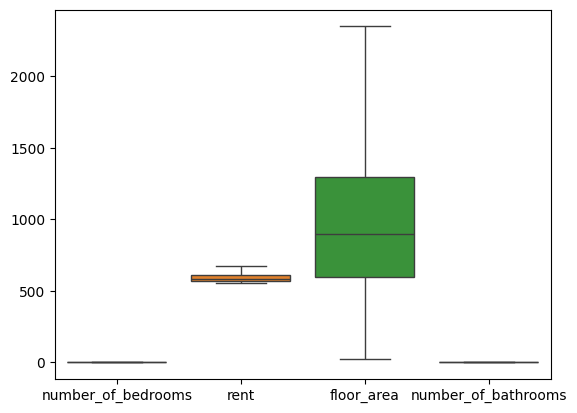

In [20]:
Q1 = testing_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.25)
Q3 = testing_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply clipping
testing_df_clean['number_of_bedrooms'] = testing_df_clean['number_of_bedrooms'].clip(lower=lower_bound['number_of_bedrooms'], upper=upper_bound['number_of_bedrooms'])
testing_df_clean['rent'] = testing_df_clean['rent'].clip(lower=lower_bound['rent'], upper=upper_bound['rent'])
testing_df_clean['floor_area'] = testing_df_clean['floor_area'].clip(lower=lower_bound['floor_area'], upper=upper_bound['floor_area'])
testing_df_clean['number_of_bathrooms'] = testing_df_clean['number_of_bathrooms'].clip(lower=lower_bound['number_of_bathrooms'], upper=upper_bound['number_of_bathrooms'])

# Create box plot for each numeric feature
sns.boxplot(data=testing_df_clean[['number_of_bedrooms', 'rent', 'floor_area', 'number_of_bathrooms']])
plt.show()

In [ ]:
# @title Data Cleaning 3 Explanation

wgt_data_cleaning_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Cleaning 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_cleaning_3_explanation

Textarea(value='', description='Data Cleaning 3 Explanation:', layout=Layout(height='100%', width='auto'), pla…

---
## F. Feature Engineering

### F.1 Copy Datasets

> Create copies of the datasets and called them `training_df_eng`, `validation_df_eng` and `testing_df_eng`

> Do not change this code

In [21]:
# Create copy of datasets

training_df_eng = training_df_clean.copy()
validation_df_eng = validation_df_clean.copy()
testing_df_eng = testing_df_clean.copy()

### F.2 New Feature "month"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [22]:
# <Student to fill this section>
training_df_eng['month'] = training_df_eng['advertised_date'].dt.month
validation_df_eng['month'] = validation_df_eng['advertised_date'].dt.month
testing_df_eng['month'] = testing_df_eng['advertised_date'].dt.month

In [23]:
training_df_eng.drop('advertised_date', axis=1, inplace=True)
validation_df_eng.drop('advertised_date', axis=1, inplace=True)
testing_df_eng.drop('advertised_date', axis=1, inplace=True)

In [ ]:
# @title Feature Engineering 1 Explanation

wgt_feature_engineering_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_1_explanation

Textarea(value='', description='Feature Engineering 1 Explanation:', layout=Layout(height='100%', width='auto'…

In [ ]:
training_df_eng.head()

,number_of_bedrooms,rent,floor_area,level,suburb,furnished,tenancy_preference,number_of_bathrooms,month
0,2.0,568.0,1100,Ground out of 2,Canberra,Unfurnished,Bachelors/Family,2.0,5
1,2.0,581.0,800,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1.0,5
2,2.0,577.0,1000,1 out of 3,Canberra,Semi-Furnished,Bachelors/Family,1.0,5
3,2.0,565.0,850,1 out of 2,Canberra,Unfurnished,Bachelors,1.0,5
4,2.0,564.0,600,Ground out of 1,Canberra,Unfurnished,Bachelors/Family,2.0,4


### F.3 New Feature "level_numerator"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>
training_df_eng['level'].value_counts()

,count
level,
1 out of 2,289
Ground out of 2,272
2 out of 3,261
1 out of 3,239
2 out of 4,235
...,...
5 out of 34,1
4 out of 31,1
4 out of 26,1


In [24]:
training_df_eng[['level_numerator', 'level_denominator']] = training_df_eng['level'].str.split(' out of ', expand=True)

training_df_eng['level_numerator'] = training_df_eng['level_numerator'].replace('Ground', '0')
training_df_eng['level_numerator'] = training_df_eng['level_numerator'].replace('Lower Basement', '-2')
training_df_eng['level_numerator'] = training_df_eng['level_numerator'].replace('Upper Basement', '-1')
training_df_eng['level_denominator'] = training_df_eng['level_denominator'].fillna('1')

training_df_eng['level_numerator'] = training_df_eng['level_numerator'].astype(int)
training_df_eng['level_denominator'] = training_df_eng['level_denominator'].astype(int)

In [25]:
validation_df_eng[['level_numerator', 'level_denominator']] = validation_df_eng['level'].str.split(' out of ', expand=True)

validation_df_eng['level_numerator'] = validation_df_eng['level_numerator'].replace('Ground', '0')
validation_df_eng['level_numerator'] = validation_df_eng['level_numerator'].replace('Lower Basement', '-2')
validation_df_eng['level_numerator'] = validation_df_eng['level_numerator'].replace('Upper Basement', '-1')
validation_df_eng['level_denominator'] = validation_df_eng['level_denominator'].fillna('1')

validation_df_eng['level_numerator'] = validation_df_eng['level_numerator'].astype(int)
validation_df_eng['level_denominator'] = validation_df_eng['level_denominator'].astype(int)

In [26]:
testing_df_eng[['level_numerator', 'level_denominator']] = testing_df_eng['level'].str.split(' out of ', expand=True)

testing_df_eng['level_numerator'] = testing_df_eng['level_numerator'].replace('Ground', '0')
testing_df_eng['level_numerator'] = testing_df_eng['level_numerator'].replace('Lower Basement', '-2')
testing_df_eng['level_numerator'] = testing_df_eng['level_numerator'].replace('Upper Basement', '-1')
testing_df_eng['level_denominator'] = testing_df_eng['level_denominator'].fillna('1')

testing_df_eng['level_numerator'] = testing_df_eng['level_numerator'].astype(int)
testing_df_eng['level_denominator'] = testing_df_eng['level_denominator'].astype(int)

In [ ]:
# @title Feature Engineering 2 Explanation

wgt_feature_engineering_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_2_explanation

Textarea(value='', description='Feature Engineering 2 Explanation:', layout=Layout(height='100%', width='auto'…

### F.4 New Feature "level_ratio"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [27]:
# <Student to fill this section>
training_df_eng['level_ratio'] = training_df_eng['level_numerator'] / training_df_eng['level_denominator']

training_df_eng.drop(['level_denominator', 'level'], axis=1, inplace=True)

In [28]:
validation_df_eng['level_ratio'] = validation_df_eng['level_numerator'] / validation_df_eng['level_denominator']

validation_df_eng.drop(['level_denominator', 'level'], axis=1, inplace=True)

In [29]:
testing_df_eng['level_ratio'] = testing_df_eng['level_numerator'] / testing_df_eng['level_denominator']

testing_df_eng.drop(['level_denominator', 'level'], axis=1, inplace=True)

In [ ]:
# @title Feature Engineering 3 Explanation

wgt_feature_engineering_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Engineering 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feature_engineering_3_explanation

Textarea(value='', description='Feature Engineering 3 Explanation:', layout=Layout(height='100%', width='auto'…

---
## G. Data Preparation for Modeling

### G.1 Copy Datasets

> Create copies of the datasets and split them into X and y

> Do not change this code

In [30]:
# Create copy of datasets

X_train = training_df_eng.copy()
X_val = validation_df_eng.copy()
X_test = testing_df_eng.copy()

y_train = X_train.pop(target_name)
y_val = X_val.pop(target_name)
y_test = X_test.pop(target_name)

### G.2 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [31]:
# <Student to fill this section>

# One-Hot Encoding for 'tenancy_preference' and 'suburb'
df_dummies = pd.get_dummies(X_train[['tenancy_preference', 'suburb']])
df_dummies = df_dummies.astype(int)
X_train = pd.concat([X_train, df_dummies], axis=1)
X_train.drop(['tenancy_preference', 'suburb'], axis=1, inplace=True)

In [32]:
# One-Hot Encoding for 'tenancy_preference' and 'suburb'
df_dummies = pd.get_dummies(X_val[['tenancy_preference', 'suburb']])
df_dummies = df_dummies.astype(int)

X_val = pd.concat([X_val, df_dummies], axis=1)
X_val.drop(['tenancy_preference', 'suburb'], axis=1, inplace=True)

In [33]:
# One-Hot Encoding for 'tenancy_preference' and 'suburb'
df_dummies = pd.get_dummies(X_test[['tenancy_preference', 'suburb']])
df_dummies = df_dummies.astype(int)

X_test = pd.concat([X_test, df_dummies], axis=1)
X_test.drop(['tenancy_preference', 'suburb'], axis=1, inplace=True)

In [ ]:
# @title Data Preparation 1 Explanation

wgt_data_preparation_1_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 1 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_1_explanation

Textarea(value='', description='Data Preparation 1 Explanation:', layout=Layout(height='100%', width='auto'), …

### G.3 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [34]:
# <Student to fill this section>

furnished_mapping = {
    'Furnished': 2,
    'Semi-Furnished': 1,
    'Unfurnished': 0
}

# Apply the mapping to the 'furnished' column
X_train['furnished_encoded'] = X_train['furnished'].map(furnished_mapping)

X_train.drop(['furnished'], axis=1, inplace=True)

In [35]:
# Apply the mapping to the 'furnished' column
X_val['furnished_encoded'] = X_val['furnished'].map(furnished_mapping)

X_val.drop(['furnished'], axis=1, inplace=True)

In [36]:
# Apply the mapping to the 'furnished' column
X_test['furnished_encoded'] = X_test['furnished'].map(furnished_mapping)

X_test.drop(['furnished'], axis=1, inplace=True)

In [ ]:
# @title Data Preparation 2 Explanation

wgt_data_preparation_2_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 2 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_2_explanation

Textarea(value='', description='Data Preparation 2 Explanation:', layout=Layout(height='100%', width='auto'), …

### G.4 Data Transformation <put_name_here>

> Provide some explanations on why you believe it is important to perform this data transformation and its impacts


In [37]:
standard_scaler = StandardScaler()

column_names = X_train.columns.tolist()

X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=column_names)
X_val = pd.DataFrame(standard_scaler.transform(X_val), columns=column_names)
X_test = pd.DataFrame(standard_scaler.transform(X_test), columns=column_names)

In [ ]:
# @title Data Preparation 3 Explanation

wgt_data_preparation_3_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Data Preparation 3 Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_data_preparation_3_explanation

Textarea(value='', description='Data Preparation 3 Explanation:', layout=Layout(height='100%', width='auto'), …

---
## H. Save Datasets

> Do not change this code

In [ ]:
# Save training set

X_train.to_csv(folder_path / 'X_train.csv', index=False)
y_train.to_csv(folder_path / 'y_train.csv', index=False)

In [ ]:
# Save validation set

X_val.to_csv(folder_path / 'X_val.csv', index=False)
y_val.to_csv(folder_path / 'y_val.csv', index=False)

In [ ]:
# Save testing set

X_test.to_csv(folder_path / 'X_test.csv', index=False)
y_test.to_csv(folder_path / 'y_test.csv', index=False)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [38]:
# <Student to fill this section>
from sklearn.dummy import DummyRegressor

base_reg = DummyRegressor(strategy='mean')
base_reg.fit(X_train, y_train)
y_train_preds = base_reg.predict(X_train)

### I.2 Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [41]:
# <Student to fill this section>

mse = mean_squared_error(y_train, y_train_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_preds)
r2 = r2_score(y_train, y_train_preds)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 399.6714953999529
RMSE: 19.99178569812994
MAE: 16.079371746710784
R2: 0.0


In [ ]:
# @title Performance Metrics Explanation

wgt_perf_metrics_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Performance Metrics Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_perf_metrics_explanation

Textarea(value='', description='Performance Metrics Explanation:', layout=Layout(height='100%', width='auto'),…

### I.3 Baseline Model Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>
(y_train_preds - y_train).sum()

np.float64(-1.255102688446641e-10)

In [ ]:
# @title Performance Metrics Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…

In [ ]:
# Clear metadata for all experiment notebooks
!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_0.ipynb" \
--ClearMetadataPreprocessor.enabled=True \
--ClearMetadataPreprocessor.clear_cell_metadata=True \
--ClearMetadataPreprocessor.clear_notebook_metadata=True \
--ClearOutputPreprocessor.enabled=False \
--inplace

!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_1.ipynb" \
--ClearMetadataPreprocessor.enabled=True \
--ClearMetadataPreprocessor.clear_cell_metadata=True \
--ClearMetadataPreprocessor.clear_notebook_metadata=True \
--ClearOutputPreprocessor.enabled=False \
--inplace

!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_2.ipynb" \
--ClearMetadataPreprocessor.enabled=True \
--ClearMetadataPreprocessor.clear_cell_metadata=True \
--ClearMetadataPreprocessor.clear_notebook_metadata=True \
--ClearOutputPreprocessor.enabled=False \
--inplace

!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_3.ipynb" \
--ClearMetadataPreprocessor.enabled=True \
--ClearMetadataPreprocessor.clear_cell_metadata=True \
--ClearMetadataPreprocessor.clear_notebook_metadata=True \
--ClearOutputPreprocessor.enabled=False \
--inplace

# Convert all notebooks to PDF
!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_0.ipynb" --to pdf
!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_1.ipynb" --to pdf
!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_2.ipynb" --to pdf
!jupyter nbconvert "/content/gdrive/MyDrive/Colab Notebooks/36106_25AU-AT1_25589351_experiment_3.ipynb" --to pdf
